# SMS CLASSIFICATION

### Agenda

* 1. Read text dataset into pandas
* 2. Vectorize text dataset ( using both CountVectorizer and TFIDFVectorizer )
* 3. Build and evaluate a model
* 4. Compare multiple models
* 5. Fine tune vectorizer
* 6. Word cloud
* 7. Lemmatization and stemming
* 8. Sentiment calculation

### What is Sentimental Analysis

Sentimental Analysis is a method used to judge someone’s feelings or make sense of their feelings according to a certain thing. It is basically a text processing process and aims to determine the class that the given text wants to express emotionally.

### Read text dataset into pandas

In [55]:
import numpy as np
import pandas as pd

In [56]:
data = pd.read_table('sms.tsv', header=None, names = ['label', 'message'])

In [57]:
data.shape

(5572, 2)

In [58]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
data['label_num'] = data.label.map({'ham':0, 'spam':1})

In [60]:
data.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [61]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [62]:
X = data.message
y = data.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)

### Vectorize text dataset

#### CountVectorizer

CountVectorizer tokenizes(tokenization means dividing the sentences in words) the text along with performing very basic preprocessing. It removes the punctuation marks and converts all the words to lowercase.

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
toNumeric = CountVectorizer()

In [65]:
toNumeric.fit(X_train)
X_train_dtm = toNumeric.transform(X_train)

In [66]:
X_test_dtm = toNumeric.transform(X_test)

### Build and evaluate a model

#### Naive Bayes

The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP). The program guesses the tag of a text, such as an email or a newspaper story, using the Bayes theorem. It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance.

In [89]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [90]:
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [91]:
y_pred_class = nb.predict(X_test_dtm)

In [92]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9755922469490309

Text(0.5, 1.0, '0: Ham 1: Spam')

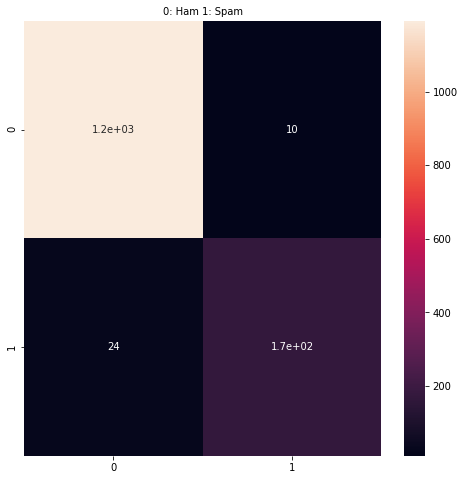

In [93]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred_class),annot=True)
plt.title("0: Ham 1: Spam",fontdict={"size":10})

In [94]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]
y_pred_prob


array([7.27099067e-12, 1.53954669e-05, 4.57049645e-03, ...,
       7.63797416e-04, 1.05115601e-05, 9.97432272e-01])

In [95]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9663344687301271

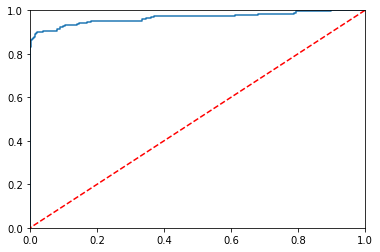

In [96]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([1,0],[1,0],'r--')

### Compare Multiple models

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [79]:
lr.fit(X_train_dtm, y_train)

LogisticRegression()

In [80]:
y_pred_class = lr.predict(X_test_dtm)

In [81]:
y_pred_prob = lr.predict_proba(X_test_dtm)[:,1]
y_pred_prob

array([0.00045097, 0.00252864, 0.00938469, ..., 0.00468338, 0.01227316,
       0.16603872])

In [82]:
metrics.accuracy_score(y_test, y_pred_class)

0.9770279971284996

Text(0.5, 1.0, '0: Ham 1: Spam')

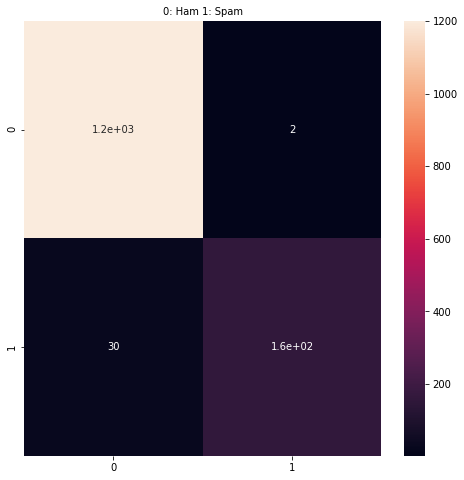

In [87]:
from sklearn.metrics import confusion_matrix,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred_class),annot=True)
plt.title("0: Ham 1: Spam",fontdict={"size":10})

In [85]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9852471012535826

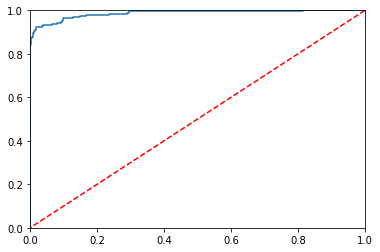

In [88]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([1,0],[1,0],'r--')

### Fine tune vectorizer

In [26]:
toNumeric = CountVectorizer()
toNumeric

CountVectorizer()

#### Stop words

The 'stop_words' parameter is used to remove common words that typically do not provide much meaning to the text, such as "the", "and", "a", etc. In this case, 'english' is passed as the value of 'stop_words', which means that common English stop words will be removed from the text before tokenization.

In [27]:
toNumeric = CountVectorizer(stop_words='english')
toNumeric.fit(X_train)
len(toNumeric.get_feature_names())

C:\Users\harik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


7191

#### ngram_range

The 'ngram_range' parameter specifies the range of n-grams to be extracted from the text. An n-gram is a contiguous sequence of n items from a given sample of text, such as words or characters. The 'ngram_range' parameter takes a tuple of two values: the minimum and maximum n-gram sizes to be included.

In [28]:
toNumeric = CountVectorizer(ngram_range=(1,2))
toNumeric.fit(X_train)
len(toNumeric.get_feature_names())

41004

#### max_df

'max_df' Ignore terms that appear in more than 75% of the documents

In [29]:
toNumeric = CountVectorizer(max_df=0.75)
toNumeric.fit(X_train)
len(toNumeric.get_feature_names())

7450

#### min_df

'min_df' Keep terms that appear in at least n documents

In [30]:
toNumeric = CountVectorizer(min_df=2)
toNumeric.fit(X_train)
len(toNumeric.get_feature_names())

3445

### Word Cloud


A word cloud is a visual representation of text data in which the most frequent words are represented with larger font sizes, and the less frequent words are represented with smaller font sizes. Word clouds are often used to quickly visualize the most common words in a text corpus or document, and can be useful for identifying trends and patterns in the data.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [33]:
data.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [34]:
sms = data.copy()

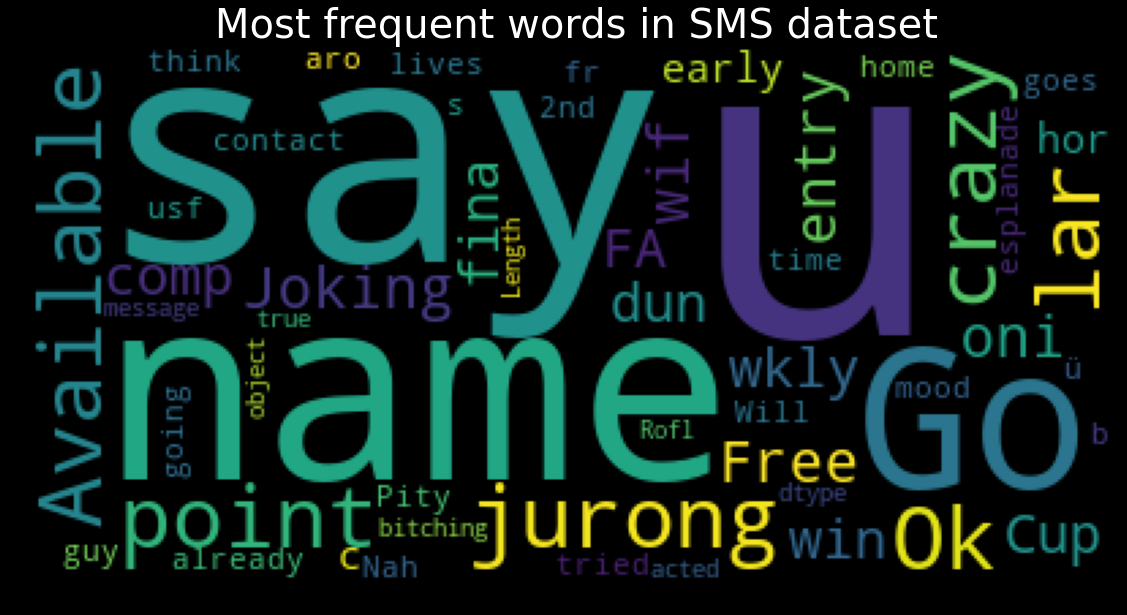

In [35]:
wc = WordCloud()
wc.generate(str(sms['message']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title('Most frequent words in SMS dataset', fontsize=40,color='white')
plt.imshow(wc)
plt.show()

### Lemmatization and Stemming

In [36]:
import nltk

#### PorterStemmer

It is one of the most common stemming algorithms which is basically designed to remove and replace well-known suffixes of English words.

#### LancasterStemmer

It was developed at Lancaster University and it is another very common stemming algorithms.

In [37]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [38]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [39]:
print(porter.stem('cats'))
print(porter.stem('troubling'))
print(porter.stem('trouble'))
print(porter.stem('troubled'))

cat
troubl
troubl
troubl


### Sentence stemming

In [40]:
sentence="Pythoners are very intelligent and work very pythonly and now they are pythoning their way to success."
porter.stem(sentence)

'pythoners are very intelligent and work very pythonly and now they are pythoning their way to success.'

In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

#### Punkt tokenizer

The Punkt tokenizer is a widely used tokenizer for English text that uses an unsupervised learning algorithm to learn the punctuation and context of English text and tokenize it into sentences.

In [47]:
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

x=stemSentence(sentence)
print(x)

python are veri intellig and work veri pythonli and now they are python their way to success . 


In [49]:
import textblob
from textblob import TextBlob

In [50]:
sent = TextBlob(sentence)

In [51]:
print(' '.join([porter.stem(word) for word in sent.words]))

python are veri intellig and work veri pythonli and now they are python their way to success


### Sentimental analysis

In [52]:
text = "I hate anything that goes in my ear"

In [53]:
result = TextBlob(text)

In [54]:
result.sentiment.polarity

-0.8

### Intepretation

A negative sentiment analysis result in SMS spam classification suggests that a message is more likely to be spam than not, and should be further analyzed or flagged as spam for further investigation.